# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot 
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,353,81,47,69,146,64,6,151,44,19,147,171,340,195,75,5,0,183,188
1,800,88,41,80,147,62,8,146,45,19,144,169,318,161,71,4,16,188,197
2,468,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
3,452,92,38,74,178,62,9,161,41,20,135,181,388,132,63,7,29,197,206
4,339,87,41,73,158,64,7,151,44,19,138,175,341,152,73,3,8,190,194
5,318,89,37,51,111,54,5,120,56,17,127,138,213,147,82,7,4,181,183
6,249,85,34,53,127,58,6,116,58,17,121,137,197,127,70,3,20,185,189
7,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
8,534,90,39,57,114,48,7,135,51,18,139,155,261,151,85,12,8,183,182
9,538,101,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.262295,93.424408,44.861566,81.774135,168.030965,61.550091,8.491803,168.675774,41.051002,20.575592,148.089253,188.540984,439.712204,175.229508,72.765027,6.457195,12.814208,188.741348,195.353370
std,241.540631,8.259049,6.240830,15.917900,34.063339,8.017530,4.641375,34.061138,7.969670,2.646480,14.698964,32.739024,181.750835,33.025899,7.685028,4.841699,8.977572,6.121529,7.432844
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,314.000000,149.000000,67.000000,3.000000,6.000000,184.000000,190.000000
50%,427.000000,93.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,633.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,595.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,39.000000,204.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE
scaler_x = preprocessing.StandardScaler()
scaler_x.fit(data)
data_scaled = scaler_x.transform(data)

X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, target, 
    test_size=0.35,
    random_state=42
)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [23]:
warnings.filterwarnings("ignore")
### YOUR CODE HERE
logreg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)

hyper_param = {
'penalty' : [None, 'l1', 'l2'],
'C' : [0.001, 0.1, 0.5, 1, 3, 5, 7, 10]
}

clf = RandomizedSearchCV(logreg, hyper_param)
search = clf.fit(X_train, y_train)
b_par = search.best_params_
print(b_par)

logreg_best = LogisticRegression(penalty=b_par['penalty'], C=b_par['C'], max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
Model_best = logreg_best.fit(X_train, y_train)
y_pred = Model_best.predict(X_test)

y_pred_proba = Model_best.predict_proba(X_test)

Ac = accuracy_score(y_test, y_pred)
print('Accuracy_score:',Ac)
F1_1 = f1_score(y_test, y_pred, labels = np.unique(target), average='micro')
print('F1 micro:', F1_1)
F1_2 = f1_score(y_test, y_pred, labels = np.unique(target), average='macro')
print('F1 macro:', F1_2)

#warnings.filterwarnings("default")

{'penalty': 'l1', 'C': 0.1}
Accuracy_score: 0.7441077441077442
F1 micro: 0.744107744107744
F1 macro: 0.7197482438388102


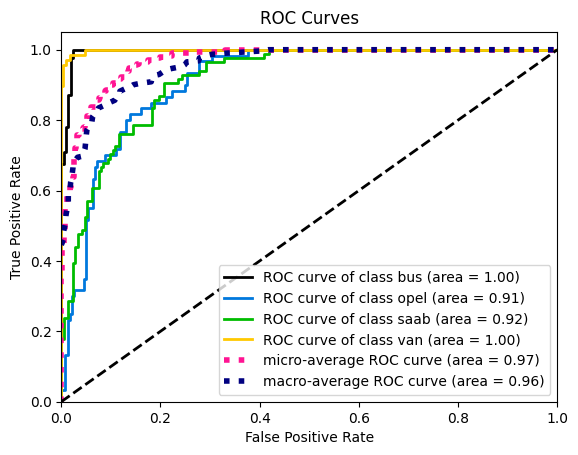

In [7]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
# ! pip install scikit-plot
svc_disp = scikitplot.metrics.plot_roc(y_test, y_pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

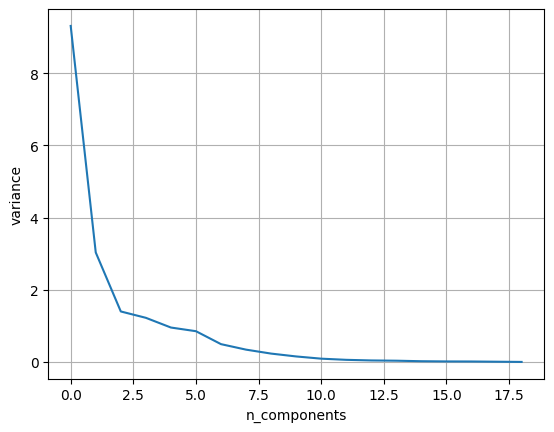

In [8]:
### YOUR CODE HERE
pca = PCA()
X_train_pca = pca.fit(X_train)
exp_var_pca = pca.explained_variance_

plt.plot(exp_var_pca)
plt.xlabel("n_components")
plt.ylabel("variance")
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [9]:
### YOUR CODE HERE
#I think we can use 10 components
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [10]:
### YOUR CODE HERE
warnings.filterwarnings("ignore")
### YOUR CODE HERE
logreg = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)

hyper_param = {
'penalty' : [None, 'l1', 'l2'],
'C' : [0.001, 0.1, 0.5, 1, 3, 5, 7, 10]
}


clf = RandomizedSearchCV(logreg, hyper_param)
search = clf.fit(X_train_pca, y_train)
b_par = search.best_params_

logreg_best = LogisticRegression(penalty=b_par['penalty'], C=b_par['C'], max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3)
Model_best = logreg_best.fit(X_train_pca, y_train)
y_pred = Model_best.predict(X_test_pca)

y_pred_proba = Model_best.predict_proba(X_test_pca)

Ac = accuracy_score(y_test, y_pred)
print('Accuracy_score:',Ac)
F1_1 = f1_score(y_test, y_pred, labels = np.unique(target), average='micro')
print('F1 micro:', F1_1)
F1_2 = f1_score(y_test, y_pred, labels = np.unique(target), average='macro')
print('F1 macro:', F1_2)

warnings.filterwarnings("default")

Accuracy_score: 0.7643097643097643
F1 micro: 0.7643097643097643
F1 macro: 0.7582346939503557


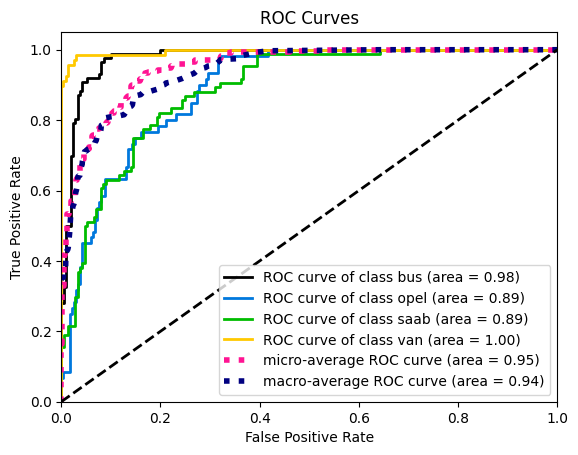

In [11]:
warnings.filterwarnings("ignore")
svc_disp = scikitplot.metrics.plot_roc(y_test, y_pred_proba)


In [12]:
warnings.filterwarnings("default")

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [52]:
# YOUR CODE HERE

tree = DecisionTreeClassifier(criterion='gini')

X_train, X_test, y_train, y_test

hyper_param_tree = {
'max_depth' : [1, 2, 4, 6, 8, 10]
}

clf = RandomizedSearchCV(tree, hyper_param_tree)
search = clf.fit(X_train, y_train)
b_par = search.best_params_
print(b_par)

tree_best = DecisionTreeClassifier(criterion='gini', max_depth=b_par['max_depth'])
Model_best = tree_best.fit(X_train, y_train)
y_pred = Model_best.predict(X_test)

y_pred_proba = Model_best.predict_proba(X_test)

Ac = accuracy_score(y_test, y_pred)
print('Accuracy_score:',Ac)
F1_1 = f1_score(y_test, y_pred, labels = np.unique(target), average='micro')
print('F1 micro:', F1_1)
F1_2 = f1_score(y_test, y_pred, labels = np.unique(target), average='macro')
print('F1 macro:', F1_2)

{'max_depth': 10}
Accuracy_score: 0.6936026936026936
F1 micro: 0.6936026936026936
F1 macro: 0.6825597433487093


/home/mikle/ML/Girafe/env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [21]:
#Bagging prepoccesing
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data, target, test_size=0.35)

(846, 19) (846,)


In [50]:
#logistic regressions
warnings.filterwarnings("ignore")
Accuracy_p = []
F1_p = []
i_n = np.linspace(2,97,num=20,dtype=int)
#Parametrs of penalty and C are taken from model LogisticRegression above

logreg_best_b = LogisticRegression(penalty='l1', C=0.1, max_iter=500, 
                                 multi_class='multinomial', solver='saga', tol=1e-3)

for i in i_n:
    bag_classifier = BaggingClassifier(estimator=logreg_best_b, n_estimators= i)

    bag_classifier.fit(X_train_b, y_train_b)

    y_pred_b = bag_classifier.predict(X_test_b)

    Ac = accuracy_score(y_test_b, y_pred_b)
    Accuracy_p.append(Ac)
#    print('Accuracy_score:',Ac)
    F1_1 = f1_score(y_test_b, y_pred_b, labels = np.unique(target), average='macro')
    F1_p.append(F1_1)
#    print('F1 micro:', F1_1)
#    F1_2 = f1_score(y_test_b, y_pred_b, labels = np.unique(target), average='macro')
#    F2_p.append(Ac)
#    print('F1 macro:', F1_2)

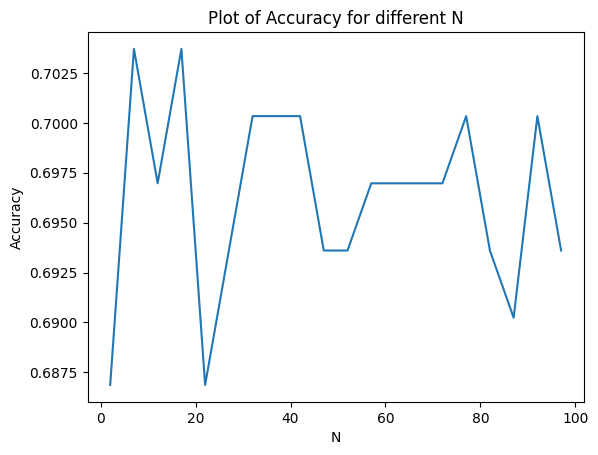

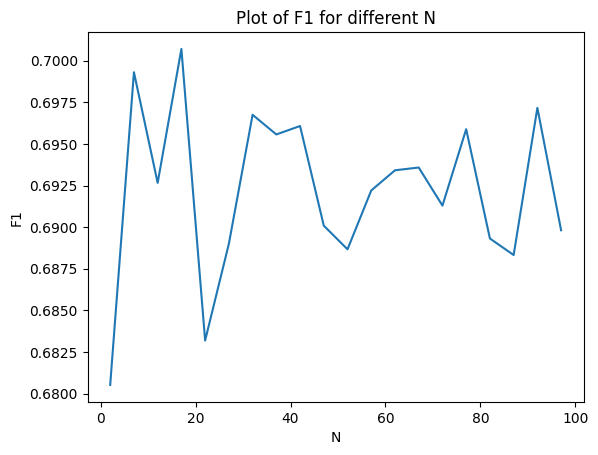

Best Accuracy is 0.7037037037037037 with n 7
Best F1 is 0.7007056026513816 with n 17


In [51]:
plt.plot(i_n, Accuracy_p)
plt.xlabel('N') #Подпись для оси х
plt.ylabel('Accuracy') #Подпись для оси y
plt.title('Plot of Accuracy for different N') #Название
plt.show()

plt.plot(i_n, F1_p)
plt.xlabel('N') #Подпись для оси х
plt.ylabel('F1') #Подпись для оси y
plt.title('Plot of F1 for different N') #Название
plt.show()

Acc_np = np.array(Accuracy_p)
F1_np = np.array(F1_p)

print("Best Accuracy is", max(Acc_np), "with n", i_n[Acc_np.argmax()])
print("Best F1 is", max(F1_np), "with n", i_n[F1_np.argmax()])

warnings.filterwarnings("default")

In [59]:
#decision trees

warnings.filterwarnings("ignore")
Accuracy_p = []
F1_p = []
i_n = np.linspace(2,97,num=20,dtype=int)
#Parametrs of penalty and C are taken from model LogisticRegression above

tree = DecisionTreeClassifier(criterion='gini', max_depth=10)

for i in i_n:
    bag_classifier = BaggingClassifier(estimator=tree, n_estimators= i)

    bag_classifier.fit(X_train_b, y_train_b)

    y_pred_b = bag_classifier.predict(X_test_b)

    Ac = accuracy_score(y_test_b, y_pred_b)
    Accuracy_p.append(Ac)
#    print('Accuracy_score:',Ac)
    F1_1 = f1_score(y_test_b, y_pred_b, labels = np.unique(target), average='macro')
    F1_p.append(F1_1)
#    print('F1 micro:', F1_1)
#    F1_2 = f1_score(y_test_b, y_pred_b, labels = np.unique(target), average='macro')
#    F2_p.append(Ac)
#    print('F1 macro:', F1_2)

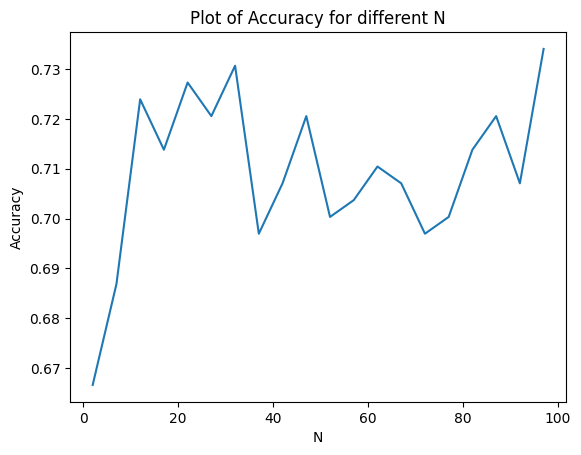

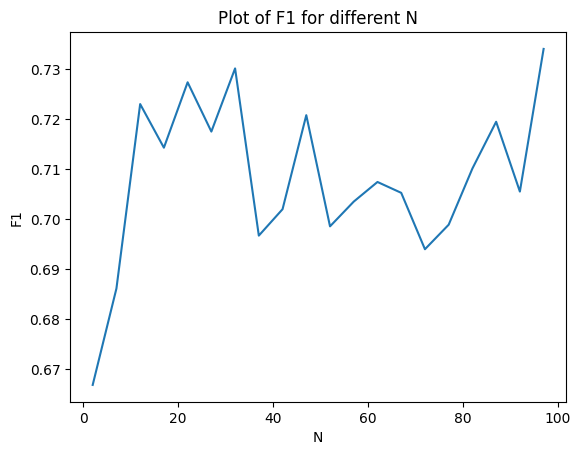

Best Accuracy is 0.734006734006734 with n 97
Best F1 is 0.734107113238635 with n 97


In [60]:
plt.plot(i_n, Accuracy_p)
plt.xlabel('N') #Подпись для оси х
plt.ylabel('Accuracy') #Подпись для оси y
plt.title('Plot of Accuracy for different N') #Название
plt.show()

plt.plot(i_n, F1_p)
plt.xlabel('N') #Подпись для оси х
plt.ylabel('F1') #Подпись для оси y
plt.title('Plot of F1 for different N') #Название
plt.show()

Acc_np = np.array(Accuracy_p)
F1_np = np.array(F1_p)

print("Best Accuracy is", max(Acc_np), "with n", i_n[Acc_np.argmax()])
print("Best F1 is", max(F1_np), "with n", i_n[F1_np.argmax()])

warnings.filterwarnings("default")


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [70]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [75]:
warnings.filterwarnings("ignore")
rfc = RandomForestClassifier()

n_estimators = np.linspace(1, 300, num=31, dtype=int)

grid=dict(n_estimators=n_estimators)
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result=grid_search.fit(X_train_f, y_train_f)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.768182 using {'n_estimators': 270}
0.655455 (0.040134) with: {'n_estimators': 1}
0.740000 (0.044014) with: {'n_estimators': 10}
0.750909 (0.027029) with: {'n_estimators': 20}
0.756364 (0.026285) with: {'n_estimators': 30}
0.749091 (0.036181) with: {'n_estimators': 40}
0.764545 (0.026175) with: {'n_estimators': 50}
0.744545 (0.016983) with: {'n_estimators': 60}
0.750000 (0.037757) with: {'n_estimators': 70}
0.760000 (0.032321) with: {'n_estimators': 80}
0.749091 (0.026722) with: {'n_estimators': 90}
0.750000 (0.027044) with: {'n_estimators': 100}
0.766364 (0.027288) with: {'n_estimators': 110}
0.758182 (0.034545) with: {'n_estimators': 120}
0.756364 (0.036770) with: {'n_estimators': 130}
0.760909 (0.026983) with: {'n_estimators': 140}
0.755455 (0.034366) with: {'n_estimators': 150}
0.757273 (0.026048) with: {'n_estimators': 160}
0.759091 (0.029388) with: {'n_estimators': 170}
0.750909 (0.021203) with: {'n_estimators': 180}
0.761818 (0.028401) with: {'n_estimators': 190}
0.757273

In [ ]:
Ac = accuracy_score(y_test, y_pred)
print('Accuracy_score:',Ac)
F1_1 = f1_score(y_test, y_pred, labels = np.unique(target), average='micro')
print('F1 micro:', F1_1)
F1_2 = f1_score(y_test, y_pred, labels = np.unique(target), average='macro')
print('F1 macro:', F1_2)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE